# Open FI$CAL API Python Examples

This document contains Python code that demonstrates how to access the demo Open FI$Cal API, located at https://catalog.ogopendata.com/.

See also the documentation for the [CKAN API](https://docs.ckan.org/en/2.8/api/) and the [CKAN Datastore API](https://docs.ckan.org/en/ckan-2.7.3/maintaining/datastore.html#the-datastore-api).

Note that this is a demo API that returns a limit of 32000 rows per request, so we have so work around that.

# Load Dependencies

If these aren't installed, you can install them by opening a terminal and running `conda install module_name` or `pip install module_name` (e.g. conda install pandas).

In [1]:
import pandas as pd # dataframe tool
import requests # sends http requests to API
import json # turn responses into json format
import pprint # makes json format easier to read
import cufflinks as cf # for charts
cf.go_offline()

# Get Resource IDs

First, we will use the CKAN API to get all the information about the `california-expenditure-data` package (dataset) and extract the IDs for each resource (month). The data is organized so that each unique resource ID is one month of data.

We will use these resource IDs for requesting data later.

In [3]:
# url for the API package
url = 'https://catalog.ogopendata.com/api/3/action/package_show?id=california-expenditure-data'

# use requests to get the API response
response = requests.get(url)

# put the response in json format
response_json = response.json()

# create an empty dictionary list to hold of all the resource IDs
resource_dictionary = []

# loop through the list of resources in the response
for x in response_json['result']['resources']:

    # append the resource id and description to the resource dictionary
    post = {
        'resource_id' : x['id'],
        'description' : x['description']
    }
    
    resource_dictionary.append(post)

# remove the first entry which is a dictionary and metadata
resource_dictionary.pop(0)

# preview the first 5 dictionary entries
print('First 5 entries:')
resource_dictionary[:5]

First 5 entries:


[{'resource_id': 'cc491680-1eb0-42d2-8dac-47a2f1204d3e',
  'description': 'Vendor Transactions for Fiscal Year 2019 Period 5 (November 2019)'},
 {'resource_id': '3e5b9f4e-c1dc-4752-bb38-096d480ca3f1',
  'description': 'Vendor Transactions for Fiscal Year 2019 Period 4 (October 2019)'},
 {'resource_id': '02129231-0d2e-4028-a955-eb35f6123c3e',
  'description': 'Vendor Transactions for Fiscal Year 2019 Period 3 (September 2019)'},
 {'resource_id': '3dc2cfff-0d33-412f-ba6e-d930958db3b7',
  'description': 'Vendor Transactions for Fiscal Year 2019 Period 2 (August 2019)'},
 {'resource_id': '0f261581-45ab-413d-bc05-d7571e73ba8b',
  'description': 'Vendor Transactions for Fiscal Year 2019 Period 1 (July 2019)'}]

# Getting Data from a Single Resource (month)
Now that we know all of the resource IDs, we can pull the for a specific month.

Note that the demo API limits us to 32000 rows per resource ID request, so we need to use the `offset` parameter to skip 32000 rows of data for each request until we retrieve all the data.

In [4]:
# url for API
url = 'https://catalog.ogopendata.com/api/3/action/datastore_search?'

# resource ID for desired month, this is november 2019
resource_id = 'cc491680-1eb0-42d2-8dac-47a2f1204d3e'

# create an empty list to hold responses for the dataframe
df_list = []

# the API limits us to 32000 rows of data, so we need to send a new request every 32000 rows
# this parameter allows us to skip rows for each request
offset = 0

# set response length > 0 to initialize the loop below
response_length = 1

# continue to make http requests as long as we keep getting responses
while response_length > 0: 
    
    # these are the paramaters we send with the http API request
    params = {
        'resource_id' : resource_id, # resource ID
        'limit' : 1000000, # the default is 100, we need more than that
        'offset' : offset # this will increase by 32000 for each request
    }
    
    # get the response
    response = requests.get(url, params=params).json()
    
    # loop through each transaction in the response and append to our list
    for x in response['result']['records']:
        df_list.append(x)
    
    # increase offset since we only get 32000 rows per response
    offset += 32000
    
    # set the response length so the loop stops when we no longer return any data
    response_length = len(response['result']['records'])
    
# turn the df_list into a pandas dataframe
df = pd.DataFrame(df_list)

# preview the dataframe and show some info about the dataframe
display(df.head())
display(df.info())

,Account Category,Budget Reference Sub-Category,Accounting Period,Account Description,Business Unit,Agency Name,Related Document,Account Type,Year of Enactment,Budget Reference Category,...,Department Name,Program Description,Budget Reference Description,Fund Description,Monetary Amount,Program Code,Fund Group,Vendor Name,_id,Fund Code
0,Other Items of Expense,Budget Act,5,Food,8955,General Government,None,Operating Expense & Equipment,2019,State Operations,...,Dept of Veterans Affairs,Clearing Account,BA State Operations-Support001,General Fund,17.14,9999000,General Fund,US FOODS INC,1,0001
1,Other Items of Expense,Budget Act,5,Food,8955,General Government,None,Operating Expense & Equipment,2019,State Operations,...,Dept of Veterans Affairs,Clearing Account,BA State Operations-Support001,General Fund,102.84,9999000,General Fund,US FOODS INC,2,0001
2,Other Items of Expense,Budget Act,5,Food,8955,General Government,None,Operating Expense & Equipment,2019,State Operations,...,Dept of Veterans Affairs,Clearing Account,BA State Operations-Support001,General Fund,136.55,9999000,General Fund,US FOODS INC,3,0001
3,Other Items of Expense,Budget Act,5,Food,8955,General Government,None,Operating Expense & Equipment,2019,State Operations,...,Dept of Veterans Affairs,Clearing Account,BA State Operations-Support001,General Fund,94.12,9999000,General Fund,US FOODS INC,4,0001
4,Other Items of Expense,Budget Act,5,Food,8955,General Government,None,Operating Expense & Equipment,2019,State Operations,...,Dept of Veterans Affairs,Clearing Account,BA State Operations-Support001,General Fund,30.42,9999000,General Fund,US FOODS INC,5,0001


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255819 entries, 0 to 255818
Data columns (total 27 columns):
Account Category                 255819 non-null object
Budget Reference Sub-Category    255817 non-null object
Accounting Period                255819 non-null object
Account Description              255819 non-null object
Business Unit                    255819 non-null object
Agency Name                      255819 non-null object
Related Document                 0 non-null object
Account Type                     255819 non-null object
Year of Enactment                255819 non-null object
Budget Reference Category        255817 non-null object
Budget Reference                 255817 non-null object
Sub-Program Description          255817 non-null object
Accounting Date                  255819 non-null object
Account Sub-Category             255819 non-null object
Fiscal Year Begin                255819 non-null object
Account                          255819 non-null objec

None

## Data Processing

Many of the columns are in `string` format, so we should convert them to a `numerical` format, convert the accounting date column to `datetime` format, drop the empty `Related Document` column, and drop rows with null fields. 

In [5]:
# make a df copy for cleaning
df_clean = df.copy()

# note above how many of the columns are in object/string format, so lets change some to numerical values
df_clean = df_clean.astype({
    'Accounting Period' : 'int32',
    'Year of Enactment' : 'int32',
    'Monetary Amount' : 'float',
    'Fiscal Year Begin' : 'int32'
})

# convert accounting dates to datetime format
df_clean['Accounting Date'] = pd.to_datetime(df_clean['Accounting Date'])

# drop the empty related document column
df_clean.drop(labels='Related Document', axis=1, inplace=True)

# drop rows with nulls
df_clean.dropna(inplace=True)

# preview results
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255817 entries, 0 to 255818
Data columns (total 26 columns):
Account Category                 255817 non-null object
Budget Reference Sub-Category    255817 non-null object
Accounting Period                255817 non-null int32
Account Description              255817 non-null object
Business Unit                    255817 non-null object
Agency Name                      255817 non-null object
Account Type                     255817 non-null object
Year of Enactment                255817 non-null int32
Budget Reference Category        255817 non-null object
Budget Reference                 255817 non-null object
Sub-Program Description          255817 non-null object
Accounting Date                  255817 non-null datetime64[ns]
Account Sub-Category             255817 non-null object
Fiscal Year Begin                255817 non-null int32
Account                          255817 non-null object
Document ID                      255817 non-

## Data Exploration
We can use pandas to explore the data a bit, for instance we can view the vendors by `Monetary Amount` or total transactions.

In [6]:
# group by vendor name and sum "Monetary Amount"
vendor_monetary_sum = df_clean.groupby(['Vendor Name']).agg('sum').sort_values(by='Monetary Amount')['Monetary Amount']
vendor_monetary_sum

Vendor Name
ST FRANCIS MEDICAL CENTER        -1.031823e+07
THE STATE BAR OF CALIFORNIA      -9.996484e+06
FDN FOR CA COMMUNITY COLLEGES    -1.571456e+06
US GEOLOGICAL SURVEY             -3.584535e+05
ALLEN COMM LEARNING SERVICES     -1.806633e+05
                                      ...     
DEPT OF WATER RESOURCES           1.556148e+08
DEPT OF DEVELOPMENTAL SERVICES    2.454861e+08
CA STUDENT AID COMMISSION         2.650225e+08
TREASURER OF LOS ANGELES CNTY     2.686897e+08
DEPT OF SOCIAL SERVICES           4.708493e+08
Name: Monetary Amount, Length: 14444, dtype: float64

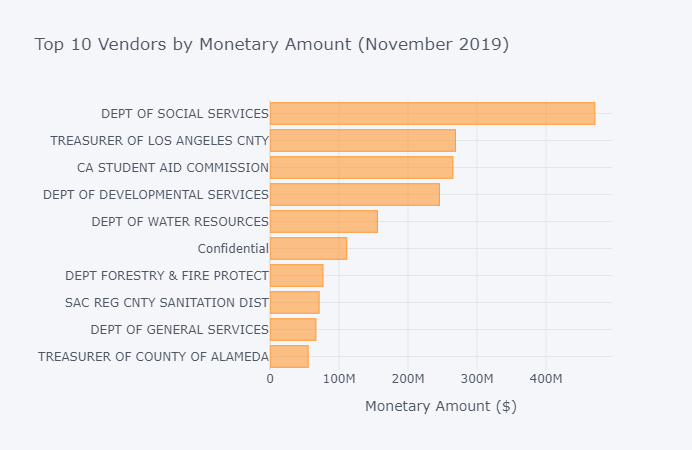

In [9]:
# bar chart of the top 10 vendors by monetary value
vendor_monetary_sum.tail(10).iplot(kind='bar', orientation='h', title='Top 10 Vendors by Monetary Amount (November 2019)',xTitle='Monetary Amount ($)')

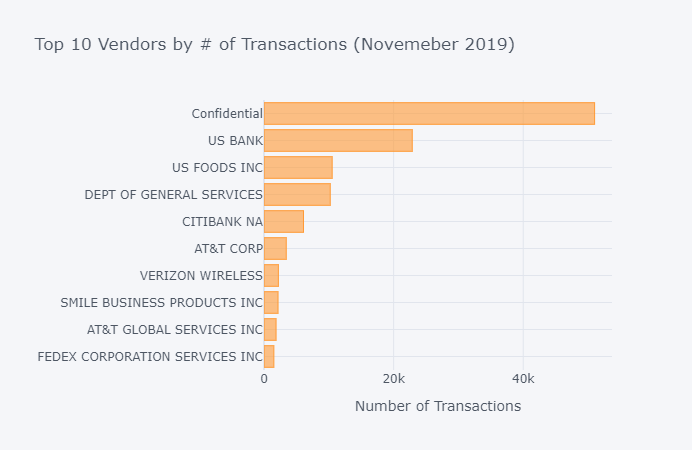

In [10]:
# bar chart with the total number of transactions by vendor
vendor_counts = df_clean['Vendor Name'].value_counts().head(10).iloc[::-1]
vendor_counts.iplot(kind='bar', orientation='h', title='Top 10 Vendors by # of Transactions (Novemeber 2019)', xTitle='Number of Transactions')

# Requesting multiple months

We can also request multiple months worth of data. Using similar code to what we have above, we can loop through a list of resource IDs. We could loop through the resource dictionary we made earlier to pull all months, but that would take awhile. There will be examples below that demonstrate that.

In [11]:
# url for API
url = 'https://catalog.ogopendata.com/api/3/action/datastore_search?'

# resource ID list for desired months, this is november 2019, 2018, and 2017
resource_id_list = [
    'cc491680-1eb0-42d2-8dac-47a2f1204d3e',
    'c007b59b-98a9-414d-9d51-f731b2dce40a',
    'd7e40b35-cb38-41c6-ae89-95ac6abc9bd7'
]

# create an empty list to hold responses for the dataframe
df_list = []

# loop through resource_id_list
for resource_id in resource_id_list:
    
    # the API limits us to 32000 rows of data, so we need to send a new request every 32000 rows
    # this parameter allows us to skip rows for each request
    offset = 0
    
    # set response length > 0 to initialize the loop below
    response_length = 1
    
    # continue to make http requests as long as we keep getting responses
    while response_length > 0: 
        
        # these are the paramaters we send with the http API request
        params = {
            'resource_id' : resource_id, # resource ID
            'limit' : 1000000, # the default is 100, we need more than that
            'offset' : offset # this will increase by 32000 for each request
        }

        # get the response
        print(f'Requesting {resource_id}')
        response = requests.get(url, params=params).json()
        
        # loop through each transaction in the response and append to our list
        for x in response['result']['records']:
            df_list.append(x)

        # increase offset since we only get 32000 rows per response
        offset += 32000

        # set the response length so the loop stops when we no longer return any data
        response_length = len(response['result']['records'])
        print(f'Current response length: {response_length}')
    
# turn the df_list into a pandas dataframe
df = pd.DataFrame(df_list)

# preview the dataframe and show some info about the dataframe
display(df.head())
display(df.info())

Requesting cc491680-1eb0-42d2-8dac-47a2f1204d3e
Current response length: 32000
Requesting cc491680-1eb0-42d2-8dac-47a2f1204d3e
Current response length: 32000
Requesting cc491680-1eb0-42d2-8dac-47a2f1204d3e
Current response length: 32000
Requesting cc491680-1eb0-42d2-8dac-47a2f1204d3e
Current response length: 32000
Requesting cc491680-1eb0-42d2-8dac-47a2f1204d3e
Current response length: 32000
Requesting cc491680-1eb0-42d2-8dac-47a2f1204d3e
Current response length: 32000
Requesting cc491680-1eb0-42d2-8dac-47a2f1204d3e
Current response length: 32000
Requesting cc491680-1eb0-42d2-8dac-47a2f1204d3e
Current response length: 31819
Requesting cc491680-1eb0-42d2-8dac-47a2f1204d3e
Current response length: 0
Requesting c007b59b-98a9-414d-9d51-f731b2dce40a
Current response length: 32000
Requesting c007b59b-98a9-414d-9d51-f731b2dce40a
Current response length: 32000
Requesting c007b59b-98a9-414d-9d51-f731b2dce40a
Current response length: 26020
Requesting c007b59b-98a9-414d-9d51-f731b2dce40a
Current 

,Account Category,Budget Reference Sub-Category,Accounting Period,Account Description,Business Unit,Agency Name,Related Document,Account Type,Year of Enactment,Budget Reference Category,...,Department Name,Program Description,Budget Reference Description,Fund Description,Monetary Amount,Program Code,Fund Group,Vendor Name,_id,Fund Code
0,Other Items of Expense,Budget Act,5,Food,8955,General Government,None,Operating Expense & Equipment,2019,State Operations,...,Dept of Veterans Affairs,Clearing Account,BA State Operations-Support001,General Fund,17.14,9999000,General Fund,US FOODS INC,1,0001
1,Other Items of Expense,Budget Act,5,Food,8955,General Government,None,Operating Expense & Equipment,2019,State Operations,...,Dept of Veterans Affairs,Clearing Account,BA State Operations-Support001,General Fund,102.84,9999000,General Fund,US FOODS INC,2,0001
2,Other Items of Expense,Budget Act,5,Food,8955,General Government,None,Operating Expense & Equipment,2019,State Operations,...,Dept of Veterans Affairs,Clearing Account,BA State Operations-Support001,General Fund,136.55,9999000,General Fund,US FOODS INC,3,0001
3,Other Items of Expense,Budget Act,5,Food,8955,General Government,None,Operating Expense & Equipment,2019,State Operations,...,Dept of Veterans Affairs,Clearing Account,BA State Operations-Support001,General Fund,94.12,9999000,General Fund,US FOODS INC,4,0001
4,Other Items of Expense,Budget Act,5,Food,8955,General Government,None,Operating Expense & Equipment,2019,State Operations,...,Dept of Veterans Affairs,Clearing Account,BA State Operations-Support001,General Fund,30.42,9999000,General Fund,US FOODS INC,5,0001


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421481 entries, 0 to 421480
Data columns (total 27 columns):
Account Category                 421481 non-null object
Budget Reference Sub-Category    421479 non-null object
Accounting Period                421481 non-null object
Account Description              421481 non-null object
Business Unit                    421481 non-null object
Agency Name                      421481 non-null object
Related Document                 0 non-null object
Account Type                     421481 non-null object
Year of Enactment                421481 non-null object
Budget Reference Category        421479 non-null object
Budget Reference                 421479 non-null object
Sub-Program Description          421479 non-null object
Accounting Date                  421481 non-null object
Account Sub-Category             421481 non-null object
Fiscal Year Begin                421481 non-null object
Account                          421481 non-null objec

None

# Querying with SQL

We can also query with a SQL select string, however the return row limit is set at 32000 and there isn't an easy way around it since this API endpoint does not have the `offset` parameter, so choose your queries well!

## Use SQL to get all vendors like %HARLEY% from a specific resource.

In [12]:
# url for API
url = 'https://catalog.ogopendata.com/api/3/action/datastore_search_sql?'

# set to whatever resource ID and vendor you want
resource_id = "cc491680-1eb0-42d2-8dac-47a2f1204d3e"
vendor = '%HARLEY%'

# sql queary text
sql_query = f'''
SELECT * FROM "{resource_id}"
WHERE "Vendor Name" LIKE '{vendor}'
'''

# request params
params = {
    'sql' : sql_query
}

# get the response
response = requests.get(url, params).json()

# create dataframe from response
df_list = []
for x in response['result']['records']:
        df_list.append(x)
df = pd.DataFrame(df_list)

# preview the dataframe and show some info about the dataframe
display(df.head())
display(df.info())

,Account Category,Budget Reference Sub-Category,Accounting Period,Account Description,Business Unit,Agency Name,Related Document,Account Type,Year of Enactment,Budget Reference Category,...,Program Description,Budget Reference Description,Fund Description,Monetary Amount,Program Code,_full_text,Fund Group,Vendor Name,_id,Fund Code
0,Other Items of Expense,Budget Act,5,Vehicle Maintena & Repair Svcs,2720,Transportation,None,Operating Expense & Equipment,2019,State Operations,...,Clearing Account,BA State Operations-Support001,"Motor Vehicle Account, Stf",326.54,9999000,'-07':12 '-11':11 '001':49 '0044':37 '2019':10...,Special Funds,REDDING HARLEY-DAVIDSON INC,127,0044
1,Other Items of Expense,Budget Act,5,Vehicle Maintena & Repair Svcs,2720,Transportation,None,Operating Expense & Equipment,2019,State Operations,...,Clearing Account,BA State Operations-Support001,"Motor Vehicle Account, Stf",737.55,9999000,'-07':12 '-11':11 '001':49 '0044':37 '2019':10...,Special Funds,POMONA VALLEY HARLEY-DAVIDSON,128,0044
2,Other Items of Expense,Budget Act,5,Vehicle Maintena & Repair Svcs,2720,Transportation,None,Operating Expense & Equipment,2019,State Operations,...,Clearing Account,BA State Operations-Support001,"Motor Vehicle Account, Stf",1282.05,9999000,'-07':12 '-11':11 '001':49 '0044':37 '1282.05'...,Special Funds,POMONA VALLEY HARLEY-DAVIDSON,129,0044
3,Other Items of Expense,Budget Act,5,Vehicle Maintena & Repair Svcs,2720,Transportation,None,Operating Expense & Equipment,2019,State Operations,...,Clearing Account,BA State Operations-Support001,"Motor Vehicle Account, Stf",24.75,9999000,'-07':12 '-11':11 '001':49 '0044':37 '2019':10...,Special Funds,POMONA VALLEY HARLEY-DAVIDSON,131,0044
4,Other Items of Expense,Budget Act,5,Vehicle Maintena & Repair Svcs,2720,Transportation,None,Operating Expense & Equipment,2019,State Operations,...,Clearing Account,BA State Operations-Support001,"Motor Vehicle Account, Stf",306.9,9999000,'-07':12 '-11':11 '001':49 '0044':37 '2019':10...,Special Funds,POMONA VALLEY HARLEY-DAVIDSON,134,0044


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 28 columns):
Account Category                 421 non-null object
Budget Reference Sub-Category    421 non-null object
Accounting Period                421 non-null object
Account Description              421 non-null object
Business Unit                    421 non-null object
Agency Name                      421 non-null object
Related Document                 0 non-null object
Account Type                     421 non-null object
Year of Enactment                421 non-null object
Budget Reference Category        421 non-null object
Budget Reference                 421 non-null object
Sub-Program Description          421 non-null object
Accounting Date                  421 non-null object
Account Sub-Category             421 non-null object
Fiscal Year Begin                421 non-null object
Account                          421 non-null object
Document ID                      421 non-null obj

None

## Use SQL to get all business units like 2720 from a specific resource.

In [13]:
# url for API
url = 'https://catalog.ogopendata.com/api/3/action/datastore_search_sql?'

# set to whatever resource ID and business unit you want
resource_id = "cc491680-1eb0-42d2-8dac-47a2f1204d3e"
business_unit = 2720

# sql queary text
sql_query = f'''
SELECT * FROM "{resource_id}"
WHERE "Business Unit" LIKE '{business_unit}'
'''

# request params
params = {
    'sql' : sql_query
}

# get the response
response = requests.get(url, params).json()

# create dataframe from response
df_list = []
for x in response['result']['records']:
        df_list.append(x)
df = pd.DataFrame(df_list)

# preview the dataframe and show some info about the dataframe
display(df.head())
display(df.info())

,Account Category,Budget Reference Sub-Category,Accounting Period,Account Description,Business Unit,Agency Name,Related Document,Account Type,Year of Enactment,Budget Reference Category,...,Program Description,Budget Reference Description,Fund Description,Monetary Amount,Program Code,_full_text,Fund Group,Vendor Name,_id,Fund Code
0,Other Items of Expense,Budget Act,5,Vehicle Maintena & Repair Svcs,2720,Transportation,None,Operating Expense & Equipment,2019,State Operations,...,Clearing Account,BA State Operations-Support001,"Motor Vehicle Account, Stf",326.54,9999000,'-07':12 '-11':11 '001':49 '0044':37 '2019':10...,Special Funds,REDDING HARLEY-DAVIDSON INC,127,0044
1,Other Items of Expense,Budget Act,5,Other Items of Expense - Goods,2720,Transportation,None,Operating Expense & Equipment,2019,State Operations,...,Clearing Account,BA State Operations-Support001,"Motor Vehicle Account, Stf",12.02,9999000,'-07':12 '-11':11 '001':45 '0044':33 '12.02':5...,Special Funds,Confidential,141,0044
2,Other Items of Expense,Budget Act,5,Vehicle Maintena & Repair Svcs,2720,Transportation,None,Operating Expense & Equipment,2019,State Operations,...,Clearing Account,BA State Operations-Support001,"Motor Vehicle Account, Stf",737.55,9999000,'-07':12 '-11':11 '001':49 '0044':37 '2019':10...,Special Funds,POMONA VALLEY HARLEY-DAVIDSON,128,0044
3,Other Items of Expense,Budget Act,5,Vehicle Maintena & Repair Svcs,2720,Transportation,None,Operating Expense & Equipment,2019,State Operations,...,Clearing Account,BA State Operations-Support001,"Motor Vehicle Account, Stf",1282.05,9999000,'-07':12 '-11':11 '001':49 '0044':37 '1282.05'...,Special Funds,POMONA VALLEY HARLEY-DAVIDSON,129,0044
4,Other Items of Expense,Budget Act,5,Vehicle Maintena & Repair Svcs,2720,Transportation,None,Operating Expense & Equipment,2019,State Operations,...,Clearing Account,BA State Operations-Support001,"Motor Vehicle Account, Stf",1366.3,9999000,'-07':12 '-11':11 '001':48 '0044':36 '1366.3':...,Special Funds,WEST COAST AUTO BODY,130,0044


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13055 entries, 0 to 13054
Data columns (total 28 columns):
Account Category                 13055 non-null object
Budget Reference Sub-Category    13055 non-null object
Accounting Period                13055 non-null object
Account Description              13055 non-null object
Business Unit                    13055 non-null object
Agency Name                      13055 non-null object
Related Document                 0 non-null object
Account Type                     13055 non-null object
Year of Enactment                13055 non-null object
Budget Reference Category        13055 non-null object
Budget Reference                 13055 non-null object
Sub-Program Description          13055 non-null object
Accounting Date                  13055 non-null object
Account Sub-Category             13055 non-null object
Fiscal Year Begin                13055 non-null object
Account                          13055 non-null object
Document ID    

None

## Loop through all months with a SQL query

We can use our resource id list we created earlier to loop through all months for our query. For example, we take take the harley vendor search we did earlier and perform over all months.

In [14]:
# url for API
url = 'https://catalog.ogopendata.com/api/3/action/datastore_search_sql?'

# set to whatever vendor you want
vendor = '%HARLEY%'

# create dataframe from response
df_list = []

for x in resource_dictionary:
    
    # sql queary text
    sql_query = f'''
    SELECT * FROM "{x['resource_id']}"
    WHERE "Vendor Name" LIKE '{vendor}'
    '''

    # request params
    params = {
        'sql' : sql_query
    }

    # get the response
    response = requests.get(url, params).json()
    print(f"Requesting {x['description']}")
    
    # write response to list
    for x in response['result']['records']:
            df_list.append(x)

# create dataframe from list
df = pd.DataFrame(df_list)

# preview the dataframe and show some info about the dataframe
display(df.head())
display(df.info())

Requesting Vendor Transactions for Fiscal Year 2019 Period 5 (November 2019)
Requesting Vendor Transactions for Fiscal Year 2019 Period 4 (October 2019)
Requesting Vendor Transactions for Fiscal Year 2019 Period 3 (September 2019)
Requesting Vendor Transactions for Fiscal Year 2019 Period 2 (August 2019)
Requesting Vendor Transactions for Fiscal Year 2019 Period 1 (July 2019)
Requesting Vendor Transactions for Fiscal Year 2018 Period 12 (June 2019)
Requesting Vendor Transactions for Fiscal Year 2018 Period 11 (May 2019)
Requesting Vendor Transactions for Fiscal Year 2018 Period 10 (April 2019)
Requesting Vendor Transactions for Fiscal Year 2018 Period 9 (March 2019)
Requesting Vendor Transactions for Fiscal Year 2018 Period 8 (February 2019)
Requesting Vendor Transactions for Fiscal Year 2018 Period 7 (January 2019)
Requesting Vendor Transactions for Fiscal Year 2018 Period 6 (December 2018)
Requesting Vendor Transactions for Fiscal Year 2018 Period 5 (November 2018)
Requesting Vendor 

,Account Category,Budget Reference Sub-Category,Accounting Period,Account Description,Business Unit,Agency Name,Related Document,Account Type,Year of Enactment,Budget Reference Category,...,Program Description,Budget Reference Description,Fund Description,Monetary Amount,Program Code,_full_text,Fund Group,Vendor Name,_id,Fund Code
0,Other Items of Expense,Budget Act,5,Vehicle Maintena & Repair Svcs,2720,Transportation,None,Operating Expense & Equipment,2019,State Operations,...,Clearing Account,BA State Operations-Support001,"Motor Vehicle Account, Stf",326.54,9999000,'-07':12 '-11':11 '001':49 '0044':37 '2019':10...,Special Funds,REDDING HARLEY-DAVIDSON INC,127,0044
1,Other Items of Expense,Budget Act,5,Vehicle Maintena & Repair Svcs,2720,Transportation,None,Operating Expense & Equipment,2019,State Operations,...,Clearing Account,BA State Operations-Support001,"Motor Vehicle Account, Stf",737.55,9999000,'-07':12 '-11':11 '001':49 '0044':37 '2019':10...,Special Funds,POMONA VALLEY HARLEY-DAVIDSON,128,0044
2,Other Items of Expense,Budget Act,5,Vehicle Maintena & Repair Svcs,2720,Transportation,None,Operating Expense & Equipment,2019,State Operations,...,Clearing Account,BA State Operations-Support001,"Motor Vehicle Account, Stf",1282.05,9999000,'-07':12 '-11':11 '001':49 '0044':37 '1282.05'...,Special Funds,POMONA VALLEY HARLEY-DAVIDSON,129,0044
3,Other Items of Expense,Budget Act,5,Vehicle Maintena & Repair Svcs,2720,Transportation,None,Operating Expense & Equipment,2019,State Operations,...,Clearing Account,BA State Operations-Support001,"Motor Vehicle Account, Stf",24.75,9999000,'-07':12 '-11':11 '001':49 '0044':37 '2019':10...,Special Funds,POMONA VALLEY HARLEY-DAVIDSON,131,0044
4,Other Items of Expense,Budget Act,5,Vehicle Maintena & Repair Svcs,2720,Transportation,None,Operating Expense & Equipment,2019,State Operations,...,Clearing Account,BA State Operations-Support001,"Motor Vehicle Account, Stf",306.9,9999000,'-07':12 '-11':11 '001':49 '0044':37 '2019':10...,Special Funds,POMONA VALLEY HARLEY-DAVIDSON,134,0044


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4044 entries, 0 to 4043
Data columns (total 28 columns):
Account Category                 4044 non-null object
Budget Reference Sub-Category    4044 non-null object
Accounting Period                4044 non-null object
Account Description              4044 non-null object
Business Unit                    4044 non-null object
Agency Name                      4044 non-null object
Related Document                 0 non-null object
Account Type                     4044 non-null object
Year of Enactment                4044 non-null object
Budget Reference Category        4044 non-null object
Budget Reference                 4044 non-null object
Sub-Program Description          4044 non-null object
Accounting Date                  4044 non-null object
Account Sub-Category             4044 non-null object
Fiscal Year Begin                4044 non-null object
Account                          4044 non-null object
Document ID                     

None

# Plain Text Search Query

We can also do a plain text search. This endpoint contains the `offset` param, so we don't have to worry about the 32000 row limit. Here we'll search for all rows containing the phrase `paper` for November 2019.

In [15]:
# url for API
url = 'https://catalog.ogopendata.com/api/3/action/datastore_search?'

# resource ID for desired month, this is november 2019
resource_id = 'cc491680-1eb0-42d2-8dac-47a2f1204d3e'

# search text
search_text = 'paper'

# create an empty list to hold responses for the dataframe
df_list = []

# the API limits us to 32000 rows of data, so we need to send a new request every 32000 rows
# this parameter allows us to skip rows for each request
offset = 0

# set response length > 0 to initialize the loop below
response_length = 1

# continue to make http requests as long as we keep getting responses
while response_length > 0: 
    
    # these are the paramaters we send with the http API request
    params = {
        'resource_id' : resource_id,
        'q' : search_text,
        'plain' : False,
        'limit' : 1000000, # the default is 100, we need more than that
        'offset' : offset # this will increase by 32000 for each request
    }
    
    # get the response
    response = requests.get(url, params=params).json()
    
    # loop through each transaction in the response and append to our list
    for x in response['result']['records']:
        df_list.append(x)
    
    # increase offset since we only get 32000 rows per response
    offset += 32000
    
    # set the response length so the loop stops when we no longer return any data
    response_length = len(response['result']['records'])
    
# turn the df_list into a pandas dataframe
df = pd.DataFrame(df_list)

# preview the dataframe and show some info about the dataframe
display(df.head())
display(df.info())

,Account Category,Budget Reference Sub-Category,Accounting Period,Account Description,rank,Business Unit,Agency Name,Related Document,Account Type,Year of Enactment,...,Department Name,Program Description,Budget Reference Description,Fund Description,Monetary Amount,Program Code,Fund Group,Vendor Name,_id,Fund Code
0,Information Technology,Budget Act,5,"IT Supplies (Paper, Toner, etc",0.057309,8570,General Government,None,Operating Expense & Equipment,2019,...,Dept of Food & Agriculture,Clearing Account,BA State Operations-Support001,General Fund,266.7,9999000,General Fund,RASIX COMPUTER CENTER,253884,0001
1,Information Technology,Budget Act,5,"IT Supplies (Paper, Toner, etc",0.057309,4150,Health and Human Services,None,Operating Expense & Equipment,2019,...,Dept of Managed Health Care,Health Plan Program,BA State Operations-Support001,Managed Care Fund,140.1,3870000,Special Funds,RASIX COMPUTER CENTER,318,0933
2,Information Technology,Budget Act,5,"IT Supplies (Paper, Toner, etc",0.057309,4150,Health and Human Services,None,Operating Expense & Equipment,2019,...,Dept of Managed Health Care,Health Plan Program,BA State Operations-Support001,Managed Care Fund,140.1,3870000,Special Funds,RASIX COMPUTER CENTER,319,0933
3,Information Technology,Budget Act,5,"IT Supplies (Paper, Toner, etc",0.057309,4150,Health and Human Services,None,Operating Expense & Equipment,2019,...,Dept of Managed Health Care,Health Plan Program,BA State Operations-Support001,Managed Care Fund,214.48,3870000,Special Funds,RASIX COMPUTER CENTER,320,0933
4,Information Technology,Budget Act,5,"IT Supplies (Paper, Toner, etc",0.057309,5175,Health and Human Services,None,Operating Expense & Equipment,2018,...,Dept of Child Support Services,Clearing Account,BA State Operations-Support001,General Fund,5186.6,9999000,General Fund,ABLEGOV INC,2044,0001


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780 entries, 0 to 1779
Data columns (total 28 columns):
Account Category                 1780 non-null object
Budget Reference Sub-Category    1780 non-null object
Accounting Period                1780 non-null object
Account Description              1780 non-null object
rank                             1780 non-null float64
Business Unit                    1780 non-null object
Agency Name                      1780 non-null object
Related Document                 0 non-null object
Account Type                     1780 non-null object
Year of Enactment                1780 non-null object
Budget Reference Category        1780 non-null object
Budget Reference                 1780 non-null object
Sub-Program Description          1780 non-null object
Accounting Date                  1780 non-null object
Account Sub-Category             1780 non-null object
Fiscal Year Begin                1780 non-null object
Account                        

None

## Plain text search for all months

Using the resource ID list we created earlier, we can return our query for all months. This is the same paper query as above. Note that this takes awhile.

In [16]:
# url for API
url = 'https://catalog.ogopendata.com/api/3/action/datastore_search?'

# search text
search_text = 'paper'

# create an empty list to hold responses for the dataframe
df_list = []

for x in resource_dictionary:
    
    # the API limits us to 32000 rows of data, so we need to send a new request every 32000 rows
    # this parameter allows us to skip rows for each request
    offset = 0

    # set response length > 0 to initialize the loop below
    response_length = 1
    
    # set resource id
    resource_id = x['resource_id']
    
    # continue to make http requests as long as we keep getting responses
    print(f"Requesting {x['description']}")
    while response_length > 0: 

        # these are the paramaters we send with the http API request
        params = {
            'resource_id' : resource_id,
            'q' : search_text,
            'plain' : False,
            'limit' : 1000000, # the default is 100, we need more than that
            'offset' : offset # this will increase by 32000 for each request
        }

        # get the response
        response = requests.get(url, params=params).json()

        # loop through each transaction in the response and append to our list
        for x in response['result']['records']:
            df_list.append(x)

        # increase offset since we only get 32000 rows per response
        offset += 32000

        # set the response length so the loop stops when we no longer return any data
        response_length = len(response['result']['records'])

# turn the df_list into a pandas dataframe
df = pd.DataFrame(df_list)

# preview the dataframe and show some info about the dataframe
display(df.head())
display(df.info())

Requesting Vendor Transactions for Fiscal Year 2019 Period 5 (November 2019)
Requesting Vendor Transactions for Fiscal Year 2019 Period 4 (October 2019)
Requesting Vendor Transactions for Fiscal Year 2019 Period 3 (September 2019)
Requesting Vendor Transactions for Fiscal Year 2019 Period 2 (August 2019)
Requesting Vendor Transactions for Fiscal Year 2019 Period 1 (July 2019)
Requesting Vendor Transactions for Fiscal Year 2018 Period 12 (June 2019)
Requesting Vendor Transactions for Fiscal Year 2018 Period 11 (May 2019)
Requesting Vendor Transactions for Fiscal Year 2018 Period 10 (April 2019)
Requesting Vendor Transactions for Fiscal Year 2018 Period 9 (March 2019)
Requesting Vendor Transactions for Fiscal Year 2018 Period 8 (February 2019)
Requesting Vendor Transactions for Fiscal Year 2018 Period 7 (January 2019)
Requesting Vendor Transactions for Fiscal Year 2018 Period 6 (December 2018)
Requesting Vendor Transactions for Fiscal Year 2018 Period 5 (November 2018)
Requesting Vendor 

,Account Category,Budget Reference Sub-Category,Accounting Period,Account Description,rank,Business Unit,Agency Name,Related Document,Account Type,Year of Enactment,...,Department Name,Program Description,Budget Reference Description,Fund Description,Monetary Amount,Program Code,Fund Group,Vendor Name,_id,Fund Code
0,Information Technology,Budget Act,5,"IT Supplies (Paper, Toner, etc",0.057309,8570,General Government,None,Operating Expense & Equipment,2019,...,Dept of Food & Agriculture,Clearing Account,BA State Operations-Support001,General Fund,266.7,9999000,General Fund,RASIX COMPUTER CENTER,253884,0001
1,Information Technology,Budget Act,5,"IT Supplies (Paper, Toner, etc",0.057309,4150,Health and Human Services,None,Operating Expense & Equipment,2019,...,Dept of Managed Health Care,Health Plan Program,BA State Operations-Support001,Managed Care Fund,140.1,3870000,Special Funds,RASIX COMPUTER CENTER,318,0933
2,Information Technology,Budget Act,5,"IT Supplies (Paper, Toner, etc",0.057309,4150,Health and Human Services,None,Operating Expense & Equipment,2019,...,Dept of Managed Health Care,Health Plan Program,BA State Operations-Support001,Managed Care Fund,140.1,3870000,Special Funds,RASIX COMPUTER CENTER,319,0933
3,Information Technology,Budget Act,5,"IT Supplies (Paper, Toner, etc",0.057309,4150,Health and Human Services,None,Operating Expense & Equipment,2019,...,Dept of Managed Health Care,Health Plan Program,BA State Operations-Support001,Managed Care Fund,214.48,3870000,Special Funds,RASIX COMPUTER CENTER,320,0933
4,Information Technology,Budget Act,5,"IT Supplies (Paper, Toner, etc",0.057309,5175,Health and Human Services,None,Operating Expense & Equipment,2018,...,Dept of Child Support Services,Clearing Account,BA State Operations-Support001,General Fund,5186.6,9999000,General Fund,ABLEGOV INC,2044,0001


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35016 entries, 0 to 35015
Data columns (total 28 columns):
Account Category                 35016 non-null object
Budget Reference Sub-Category    35016 non-null object
Accounting Period                35016 non-null object
Account Description              35016 non-null object
rank                             35016 non-null float64
Business Unit                    35016 non-null object
Agency Name                      35016 non-null object
Related Document                 0 non-null object
Account Type                     35016 non-null object
Year of Enactment                35016 non-null object
Budget Reference Category        35016 non-null object
Budget Reference                 35016 non-null object
Sub-Program Description          35016 non-null object
Accounting Date                  35016 non-null object
Account Sub-Category             35016 non-null object
Fiscal Year Begin                35016 non-null object
Account       

None